180403_Tue

## Scale
1. sklearn.StandardScaler
2. sklearn.RobustScaler
3. sklearn.MinMaxScaler

### cancer data 스케일 조정

In [1]:
from sklearn.datasets import load_breast_cancer
cancer= load_breast_cancer()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X= cancer.data
y= cancer.target
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=1)

In [7]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

### MinMaxScaler
앞으로 안 쓸거니까 한 번쯤 해보자
> ㄴㄴ cancer데이터에선 StandardScaler보다 높았음

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler= MinMaxScaler()

#### train~scale

In [10]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
X_train_scaled= scaler.transform(X_train)

In [13]:
print('조정 후 크기\n ',X_train_scaled.shape)
print('조정전 특성별min\n', X_train.min(axis=0))
print('조정전 특성별max\n', X_train.max(axis=0))
print('조정후 특성별min\n', X_train_scaled.min(axis=0))
print('조정후 특성별min\n', X_train_scaled.max(axis=0))

조정 후 크기
  (426, 30)
조정전 특성별min
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
조정전 특성별max
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
조정후 특성별min
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
조정후 특성별min
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


#### test~scale 틀린 방법

In [14]:
X_test_scaled= scaler.transform(X_test)

In [16]:
print('조정후 특성별min\n',X_test_scaled.min(axis=0))
print('조정후 특성별max\n',X_test_scaled.max(axis=0))

조정후 특성별min
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
조정후 특성별max
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


### min~max가 0~1 아닌 이유??
p173
> train, test모두 '같은 변환'으로 해야>> MinMaxScaler().fit(X_train)

#### ??? .fit(test)같은 코드 없는데???
아모르겠일단ㅡ

### make_blobs 데이터 스케일 조정

#### test~scale 옳은 방법
MinMaxScaler().fit(X_train)

In [17]:
from sklearn.datasets import make_blobs

In [19]:
# 아무거나 만듦
X,_= make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

In [20]:
X_train, X_test= train_test_split(X, random_state=0, test_size=.1)

##### train, test 산점도

In [23]:
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

##### plot
1. make_blobs 스케일 조정
2. ㅇㅇ같은 train으로 스케일 조정
3. ㄴㄴ다르게 스케일 조정(다른걸 표준화라 할 수 없음!)

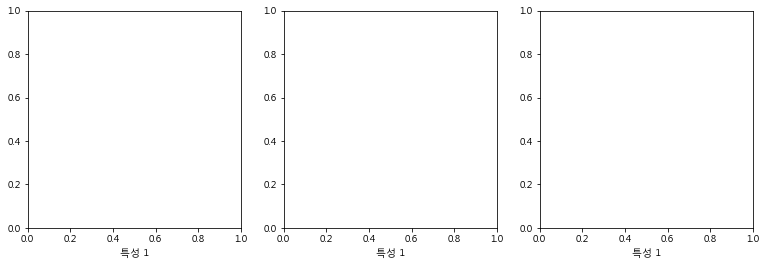

In [64]:
fig.clear('all')
font= {
    'family':'Malgun Gothic'
    ,'size':10
}
plt.rc('font', **font)
fig, axis= plt.subplots(1,3, figsize=(13,4))

for ax in axis:
    ax.set_xlabel('특성 0')
    ax.set_xlabel('특성 1')

##### 1

In [65]:
axis[0].scatter(X_train[:,0], X_train[:,1]
               , c=mglearn.cm2(0), label='train set', s=60)
axis[0].scatter(X_test[:,0], X_test[:,1], marker='^'
               , c=mglearn.cm2(1), label='test set', s=60)

axis[0].legend(loc='upper left')
axis[0].set_title('원본데이터')

Text(0.5,1,'원본데이터')

##### 2

In [66]:
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

axis[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1]
               , c=mglearn.cm2(0), label='train set', s=60)
axis[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker='^'
               , c=mglearn.cm2(1), label='test set', s=60)
axis[1].set_title('옳은 조정_scaler.fit(X_train)')

Text(0.5,1,'옳은 조정_scaler.fit(X_train)')

##### 3

In [67]:
test_scaler= MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_wrong= test_scaler.transform(X_test)

axis[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1]
               , c=mglearn.cm2(0), label='train set', s=60)
axis[2].scatter(X_test_scaled_wrong[:,0], X_test_scaled_wrong[:,1]
               , c=mglearn.cm2(1), label='test set', s=60, marker='^')
axis[2].set_title('틀린 조정_scaler.fit(X_test)')

Text(0.5,1,'틀린 조정_scaler.fit(X_test)')

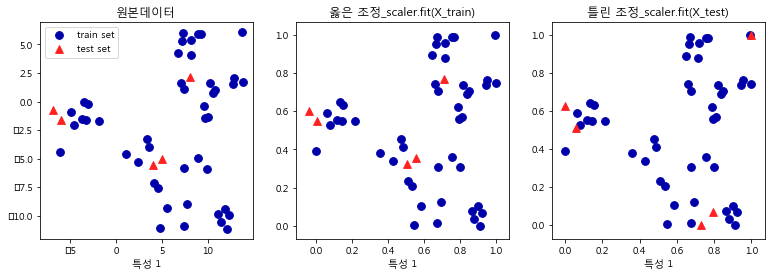

In [68]:
fig

#### ! test data에만 별도의 scale기준을 적용해서, 빨간 test데이터의 산점도만 확 벌어졌다

### cancer데이터 SVM 분석

In [69]:
from sklearn.svm import SVC

In [70]:
X= cancer.data
y= cancer.target
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)

In [72]:
svm= SVC(C=100)
svm.fit(X_train, y_train)
print('조정전 test%9.5f'%svm.score(X_test,y_test))

조정전 test  0.62937


#### Scale: MinMaxScaler 사용
0.62937 => 0.96503 대폭 증가!

In [73]:
scaler= MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [74]:
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

조정된 데이터로 SVM학습

In [75]:
svm.fit(X_train_scaled, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [76]:
print('MMS조정후 test%9.5f'%svm.score(X_test_scaled, y_test))

MMS조정후 test  0.96503


#### Scale: StandardScaler 사용
오잉 MMS보다 낮은 0.95804

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler= StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

조정된걸로 SVM학습

In [80]:
svm.fit(X_train_scaled, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
print('SS조정후 test%9.5f'%svm.score(X_test_scaled, y_test))

SS조정후 test  0.95804
